## 03 测试我们的算法
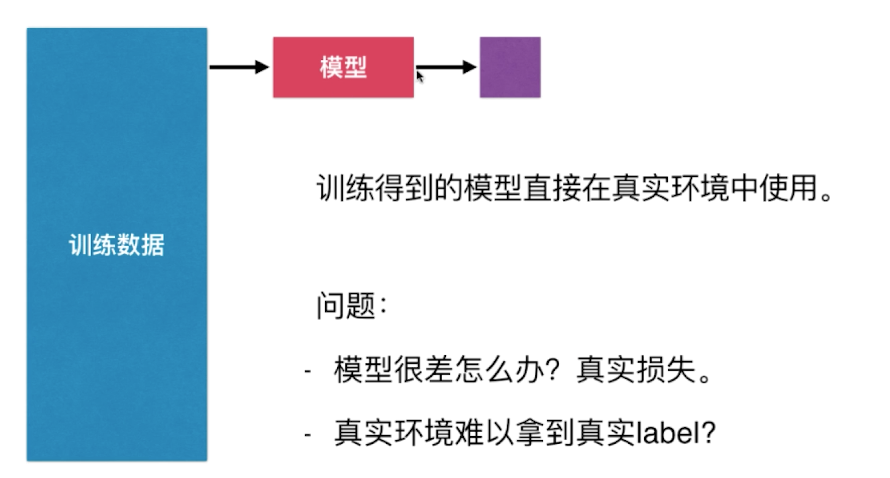

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets 

In [65]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [66]:
X = iris.data

In [67]:
y = iris.target

In [68]:
X.shape

(150, 4)

In [69]:
y.shape

(150,)

### train_test_split

分离出一部分数据做训练，另外一部分数据做测试。

In [70]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [71]:
shuffled_indexes = np.random.permutation(len(X))
shuffled_indexes

array([ 69,  11,   5,   9,  12, 148, 111,  34,  73, 104, 108,  47,  60,
       102,  95,  75, 139, 110,  55,  77,  49,   6,  92,  32, 124,  21,
       127, 130,  66,  58,  63,   0,  80, 144,  97,   1,   8,  79, 123,
       101,  50,  23,  90,  56,  19, 149, 142,  57,  72, 147,  86, 145,
        15,  91,   4,  62,  41,  39, 135, 112, 115,  38, 138,  33, 125,
       134,  35,  87,  26, 114,  61, 143, 103,  43,  82, 140, 141,  30,
        78, 146,  10,  22,  51, 122,  18,  31, 113, 131, 129,   7,  65,
        59,  36,  85,  81,  28, 116, 118,  83,  67,  52, 109, 119,  16,
        25,   2, 136,  94,  93,  45, 132,  76,  71,  99,  54,  20,  96,
         3, 117,  64, 128, 120,  48,  46,  13, 126,  88,  53,  68, 107,
       121,  40,  29, 133,  89,  44,  42,  98, 137,  17, 100,  84,  24,
        27,  74, 106,  37,  14,  70, 105])

In [72]:
test_ratio = 0.2
test_size = int(len(X) * test_ratio)

In [73]:
test_indexes = shuffled_indexes[:test_size]
train_indexes = shuffled_indexes[test_size:]

In [74]:
X_train = X[train_indexes]
y_train = y[train_indexes]

X_test = X[test_indexes]
y_test = y[test_indexes]

In [75]:
print(X_train.shape)
print(y_train.shape)

(120, 4)
(120,)


In [76]:
print(X_test.shape)
print(y_test.shape)

(30, 4)
(30,)


#### 封装

In [83]:
from playML.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [84]:
print(X_train.shape)
print(y_train.shape)

(120, 4)
(120,)


In [85]:
print(X_test.shape)
print(y_test.shape)

(30, 4)
(30,)


#### 测试我们的算法

In [86]:
from playML.kNN import KNNClassifier

my_knn_clf = KNNClassifier(k=3)
my_knn_clf.fit(X_train, y_train)
y_predict = my_knn_clf.predict(X_test)

In [87]:
y_predict

array([2, 1, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0, 1, 2, 1, 1, 0, 1, 0,
       1, 1, 2, 2, 0, 0, 1])

In [88]:
y_test

array([2, 1, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 2, 2, 0, 1, 2, 1, 1, 0, 1, 0,
       1, 1, 2, 2, 0, 0, 1])

In [90]:
sum(y_predict == y_test)

29

In [91]:
sum(y_predict == y_test) / len(y_test)

0.96666666666666667

#### sklearn中的train_test_split

In [92]:
from sklearn.model_selection import train_test_split

train_test_split

<function sklearn.model_selection._split.train_test_split>

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [94]:
print(X_train.shape)
print(y_train.shape)

(120, 4)
(120,)


In [95]:
print(X_test.shape)
print(y_test.shape)

(30, 4)
(30,)
